In [2]:
import torch
from torch import nn
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from matplotlib import pyplot as plt

In [9]:
# Create dataset

train_data = datasets.FashionMNIST(root='03_data',
                                    train=True,
                                    download=True,
                                    transform=torchvision.transforms.ToTensor(),
                                    target_transform=None)

test_data = datasets.FashionMNIST(root='03_data',
                                     train=False,
                                     download=True,
                                     transform=ToTensor(),
                                     target_transform=None)


In [10]:
# check dataset shape

print(f'Train data shape: {train_data[0][0].shape}')
print(f'Train data label: {train_data[0][1]}')

print(f'Test data shape: {test_data[0][0].shape}')
print(f'Test data label: {test_data[0][1]}')

Train data shape: torch.Size([1, 28, 28])
Train data label: 9
Test data shape: torch.Size([1, 28, 28])
Test data label: 9


In [11]:
class_names = datasets.FashionMNIST.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

C:\Users\tianx\AppData\Local\Temp\ipykernel_17000\1085552497.py:13: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  images.show()


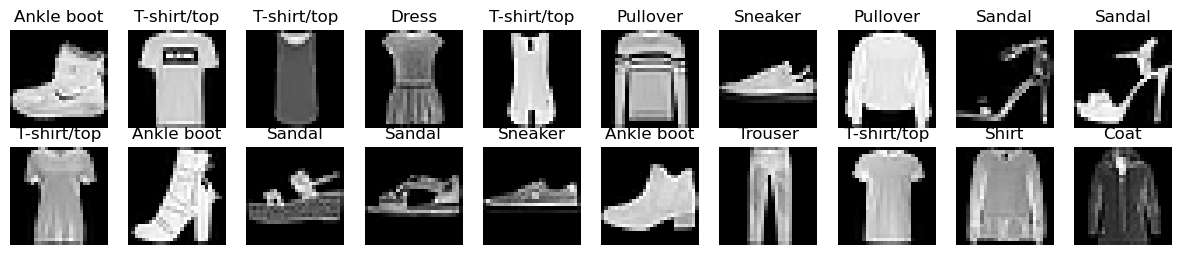

In [12]:
# Some examples of a training image

torch.manual_seed(314)
images = plt.figure(figsize=(15,15))

for i in range(20):
    image, label = train_data[i]
    ax = images.add_subplot(10, 10, i+1)
    ax.set_title(class_names[label])
    ax.imshow(image.permute(1, 2, 0), cmap='gray') # x value, y value, and lastly the color channel
    ax.axis('off')

images.show()

In [13]:
# Break data into batches as it is more memory-efficient for RAM
# Break into 32 baches as it is a common size for CNNs
# This also allows the model to change gradients(parameters) more throughout each epoch

from torch.utils.data import DataLoader
batch_size = 32
train_data_loader = torch.utils.data.DataLoader(train_data,
                                          batch_size=batch_size,
                                          shuffle=True)

test_data_loader = torch.utils.data.DataLoader(test_data,
                                          batch_size=batch_size,
                                          shuffle=False)

len(train_data_loader), len(test_data_loader)

(1875, 313)

In [14]:
train_data_batch, train_data_labels = next(iter(train_data_loader))
print(train_data_batch.shape, train_data_labels.shape)

flatten = nn.Flatten()
one_image = train_data_batch[5]
one_image_label = train_data_labels[5]

flatten(one_image).shape

torch.Size([32, 1, 28, 28]) torch.Size([32])


torch.Size([1, 784])

In [15]:
class Computer_Vision_CNN_model(nn.Module):
    def __init__(self, input_shape: int, output_shape: int, hidden_units_size: int):
        super(Computer_Vision_CNN_model, self).__init__()

        self.convolutional_block_1 = nn.Sequential(

            # First block of convolutional layers
            nn.Conv2d(
                in_channels=input_shape,
                out_channels=hidden_units_size,
                kernel_size=3, # size of the convolving square on the image
                stride=1, # step size of the convolving sqare
                padding=1, # adds zero pixels around the image to maintain the size of the output
                           # By default, it is set to 1, which means one row/column of zeros is added to each side of the input. 
                           # This is done to maintain the size of the output.
            ),
            nn.ReLU(),

            # Second block of convolutional layers
            nn.Conv2d(
                in_channels=hidden_units_size,
                out_channels=hidden_units_size,
                kernel_size=3,
                stride=1,
                padding=1
            ),

            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2) # downsample the image by taking the maximum value within each 2x2 block
        )

        # Second block of the CNN model

        self.convolutional_block_2 = nn.Sequential(

            # First block of convolutional layers
            nn.Conv2d(
                in_channels=hidden_units_size,
                out_channels=hidden_units_size,
                kernel_size=3, # size of the convolving square on the image
                stride=1, # step size of the convolving square
                padding=1, # adds zero pixels around the image to maintain the size of the output
                           # By default, it is set to 1, which means one row/column of zeros is added to each side of the input. 
                           # This is done to maintain the size of the output.
            ),

            nn.ReLU(),

            # Second block of convolutional layers
            nn.Conv2d(
                in_channels=hidden_units_size,
                out_channels=hidden_units_size,
                kernel_size=3,
                stride=1,
                padding=1
            ),

            nn.ReLU(),

            nn.MaxPool2d(kernel_size=2, stride=2) # downsample the image by taking the maximum value within each 2x2 block
        )

        # Third (Last) block of the CNN model

        self.convolutional_block_3 = nn.Sequential(

            # First block of convolutional layers
            nn.Conv2d(
                in_channels=hidden_units_size,
                out_channels=hidden_units_size,
                kernel_size=3, # size of the convolving square on the image
                stride=1, # step size of the convolving sqare
                padding=1, # adds zero pixels around the image to maintain the size of the output
                           # By default, it is set to 1, which means one row/column of zeros is added to each side of the input. 
                           # This is done to maintain the size of the output.
            ),

            nn.ReLU(),

            # Second block of convolutional layers
            nn.Conv2d(
                in_channels=hidden_units_size,
                out_channels=hidden_units_size,
                kernel_size=3,
                stride=1,
                padding=1
            ),

            nn.ReLU(),
            
            nn.MaxPool2d(kernel_size=2, stride=2) # downsample the image by taking the maximum value within each 2x2 block
        )

        # Since this is the last block, we apply a output (classifier) layer
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units_size* (int)(int(len(train_data_batch[0][0][0]))/(2**3))**2, 
                      # Account for the fact that image gets reduced by 3 times(in each of the 3 blocks) due to max pooling
                      
                       out_features=output_shape),
        )
    def forward(self, train_data):
        # print(train_data.shape)  # Input shape: (batch_size, channels, height, width)
        x = self.convolutional_block_1(train_data)
        # print(x.shape) # Print the shape after the first block to help understand the shape of the image after each block
        x = self.convolutional_block_2(x)
        # print(x.shape)
        x = self.convolutional_block_3(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x

In [16]:
# Load the model
torch.manual_seed(314)
model = Computer_Vision_CNN_model(input_shape=1, output_shape=10, hidden_units_size=len(class_names))
model

Computer_Vision_CNN_model(
  (convolutional_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convolutional_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (convolutional_block_3): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(st

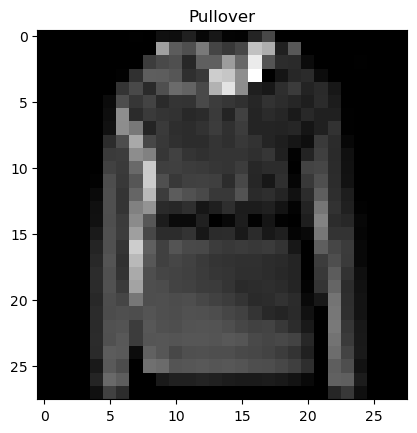

In [17]:
plt.title(class_names[one_image_label])
plt.imshow(one_image.squeeze(), cmap='gray')

In [18]:
# Example the model's output on a single image with untrained model
model(one_image.unsqueeze(0))

tensor([[ 0.1162, -0.0540, -0.0687, -0.0006, -0.1074, -0.0188,  0.1250,  0.0437,
          0.1107, -0.0003]], grad_fn=<AddmmBackward0>)

In [19]:
# Create loss function and optimizer

loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [20]:
# Accuracy function
def calculate_accuracy(y_truth, y_pred):
    correct = torch.eq(y_truth, y_pred).sum().item()
    return correct/len(y_pred) * 100

In [580]:
# Training loop and testing loop

epoches = 50

for epoch in range(epoches):
    print(f'Epoch: {epoch}\n-----------------------------------')

    ### Training ###
    total_train_loss = 0
    # Since we are using a batch size of 32, we need to iterate over the training data in batches
    for batch_i, (Image, label) in enumerate(train_data_loader):
        model.train()

        # 1.Forward pass
        train_y_pred = model(Image)

        # 2. Compute loss
        train_loss = loss_function(train_y_pred, label)
        total_train_loss += train_loss
        # 3. Zero the gradients
        optimizer.zero_grad()

        # 4. Backward pass (backpropagation)
        train_loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print progress
        if batch_i % 500 == 0:
            print(f'Finished {batch_i*len(Image)}/{len(train_data_loader.dataset)} samples')

    # Find average loss per batch
    train_loss = total_train_loss / len(train_data_loader)
    print(f'Epoch: {epoch}, Training Loss: {train_loss:.4f}')

    ### Testing ###
    total_test_loss,test_accuracy = 0,0
    model.eval()
    with torch.inference_mode():
        for batch_i, (Image, label) in enumerate(test_data_loader):
            # 1. Forward pass
            test_y_pred = model(Image)

            # 2. Compute loss
            test_loss = loss_function(test_y_pred, label)
            total_test_loss += test_loss

            # 3. Compute accuracy
            test_accuracy += calculate_accuracy(y_truth=label, y_pred=test_y_pred.argmax(dim=1))

        # Average loss and accuracy per epoch
        test_loss /= len(test_data_loader)
        test_accuracy /= len(test_data_loader)

        print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f},Test Loss: {test_loss:.4f}, Testing Accuracy: {test_accuracy:.2f}%')
        print('-----------------------------------\n')

Epoch: 0
-----------------------------------
Finished 0/60000 samples
Finished 16000/60000 samples
Finished 32000/60000 samples
Finished 48000/60000 samples
Epoch: 0, Training Loss: 2.3030
Epoch: 0, Train Loss: 2.3030,Test Loss: 0.0074, Testing Accuracy: 9.99%
-----------------------------------

Epoch: 1
-----------------------------------
Finished 0/60000 samples
Finished 16000/60000 samples
Finished 32000/60000 samples
Finished 48000/60000 samples
Epoch: 1, Training Loss: 2.3017
Epoch: 1, Train Loss: 2.3017,Test Loss: 0.0074, Testing Accuracy: 11.02%
-----------------------------------

Epoch: 2
-----------------------------------
Finished 0/60000 samples
Finished 16000/60000 samples
Finished 32000/60000 samples
Finished 48000/60000 samples
Epoch: 2, Training Loss: 1.9602
Epoch: 2, Train Loss: 1.9602,Test Loss: 0.0021, Testing Accuracy: 61.52%
-----------------------------------

Epoch: 3
-----------------------------------
Finished 0/60000 samples
Finished 16000/60000 samples
Finis

In [21]:
print(class_names[one_image_label])
class_names[model(one_image.unsqueeze(0)).argmax(dim=1)]


Pullover


'Shirt'

In [582]:
# Save the trained model
torch.save(model, "03_CNN_model.pth")

In [23]:
total_test_loss,test_accuracy = 0,0
model = torch.load("03_CNN_model.pth")
model.eval()
with torch.inference_mode():
    for batch_i, (Image, label) in enumerate(test_data_loader):
        # 1. Forward pass
        test_y_pred = model(Image)

        # 2. Compute loss
        test_loss = loss_function(test_y_pred, label)
        total_test_loss += test_loss

        # 3. Compute accuracy
        test_accuracy += calculate_accuracy(y_truth=label, y_pred=test_y_pred.argmax(dim=1))

    # Average loss and accuracy per epoch
    test_loss /= len(test_data_loader)
    test_accuracy /= len(test_data_loader)

    print(f'Final Test Loss: {test_loss:.4f} | Final Testing Accuracy: {test_accuracy:.2f}%')

Final Test Loss: 0.0006 | Final Testing Accuracy: 90.50%


In [24]:
model = torch.load("03_CNN_model.pth")
model.eval()
with torch.inference_mode():
    for batch_i, (Image, label) in enumerate(test_data_loader):
        
        preds = model(Image)
        preds_label = preds.argmax(dim=1)

        for i in preds_label:
            if label[i] != preds_label[i]:
                print(f'Label: {class_names[label[i]]}, Predicted: {class_names[preds_label[i]]}')


Label: Ankle boot, Predicted: Sneaker
Label: Pullover, Predicted: T-shirt/top
Label: Pullover, Predicted: T-shirt/top
Label: Dress, Predicted: Coat
Label: Pullover, Predicted: T-shirt/top
Label: Ankle boot, Predicted: Sneaker
Label: Dress, Predicted: Coat
Label: Pullover, Predicted: T-shirt/top
Label: Dress, Predicted: Coat
Label: Pullover, Predicted: Coat
Label: T-shirt/top, Predicted: Shirt
Label: Pullover, Predicted: Coat
Label: T-shirt/top, Predicted: Shirt
Label: Pullover, Predicted: Coat
Label: Pullover, Predicted: Coat
Label: Pullover, Predicted: Coat
Label: Shirt, Predicted: Coat
Label: Shirt, Predicted: Coat
Label: Shirt, Predicted: Coat
Label: Shirt, Predicted: Coat
Label: Dress, Predicted: Shirt
Label: T-shirt/top, Predicted: Dress
Label: T-shirt/top, Predicted: Dress
Label: T-shirt/top, Predicted: Dress
Label: Dress, Predicted: T-shirt/top
Label: Shirt, Predicted: Dress
Label: Dress, Predicted: T-shirt/top
Label: Dress, Predicted: T-shirt/top
Label: Shirt, Predicted: Dress
